<a href="https://colab.research.google.com/github/Olubbadeh/-Significantly-Different_final-project_dsml2021/blob/main/Customer_Personality_Analysis_SD_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personality Analysis for Marketing Campaign

# **Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### **People**

    ID: dfomer's unique identifier
    Year_Birth: dfomer's birth year
    Education: dfomer's education level
    Marital_Status: dfomer's marital status
    Income: dfomer's yearly household income
    Kidhome: Number of children in dfomer's household
    Teenhome: Number of teenagers in dfomer's household
    Dt_dfomer: Date of dfomer's enrollment with the company
    Recency: Number of days since dfomer's last purchase
    Complain: 1 if dfomer complained in the last 2 years, 0 otherwise


**Products**

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years


**Promotion**

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if dfomer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if dfomer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if dfomer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if dfomer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if dfomer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if dfomer accepted the offer in the last campaign, 0 otherwise


**Place**

    NumWebPurchases: Number of purchases made through the company’s web site
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s web site in the last month


### (1) Import libraries

In [1140]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from math import floor


### (2) Import the CSV file

In [1141]:
## importing the csv file
df = pd.read_csv('./marketing-campaign.csv')

In [1142]:
## Reading the csv file
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### (3) Explore data (for example, see what is categorial and numerical)

In [1143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1144]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [1145]:
## Checking for number of rows and columns
df.shape

(2240, 29)

### (4) Feature engineering for data that is
#### (a) relevant 
#### (b) unique
#### (c) correct 
#### (d) not missing

#### Drop data that is not a,b,c, or d


In [1146]:
# checking for Null values
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [1147]:
## Filling the null values of Income with the mean of income column
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [1148]:
# checking for Null values
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [1149]:
## Checking for unique values in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [1150]:
#Checking NuLL Values And Dropping Them Off
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1151]:
## Dropping irrelevant features
df = df.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'], axis = 1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Changing values

In [1152]:
## name of all columns
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


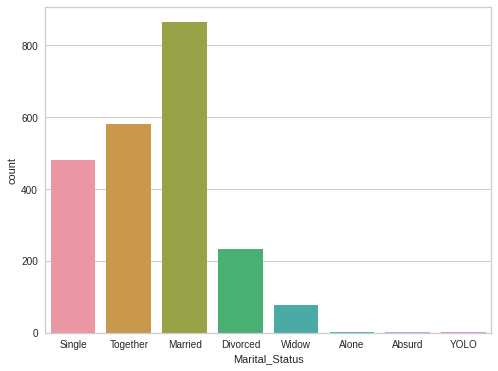

In [1153]:
# Analyze Marital status 
print(df['Marital_Status'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Marital_Status'])

In [1154]:
#correlation between Marital_Status and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')
 
columns_to_be_analyzed = ['MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Marital_df = df.groupby(by = ['Marital_Status']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum',
                                              'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = Marital_df['Marital_Status'].to_numpy(), 
                             y = Marital_df[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace", size=12, color="#7f7f7f"), showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [1155]:
## Changing marital status
## using map function from dataframe
marital_status = {
    "Single": "non_relationship",
    "Together": "in_relationship",
    "Married": "in_relationship",
    "Divorced": "non_relationship",
    "Widow": "non_relationship",
    "Alone": "non_relationship",
    "Absurd": "non_relationship",
    "YOLO": "non_relationship"
}

In [1156]:
## Below command goes through every entry in the notebook and replaces each data with its associated value in the dictionary
df["Marital_Status"] = df["Marital_Status"].map(marital_status)

In [1157]:
## Checking if everything is substituted
df["Marital_Status"].value_counts()

in_relationship     1444
non_relationship     796
Name: Marital_Status, dtype: int64

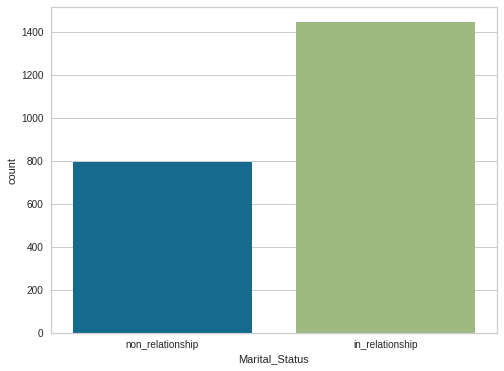

In [1158]:
## Visulaize Marital Status
plt.figure(figsize=(8,6))
sns.countplot(df['Marital_Status']) 

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


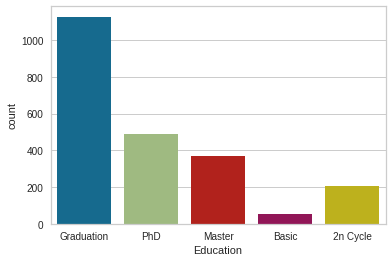

In [1159]:
# Analyze Education 
print(df['Education'].value_counts())
sns.countplot(df['Education'])
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['Education'].value_counts().index, values=df['Education'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing Education")
fig.show()

In [1160]:
# Correlation we can find between Education and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')


Edu_df = df.groupby(by = ['Education']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum','MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = Edu_df['Education'].to_numpy(), 
                             y = Edu_df[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace", size=12, color="#7f7f7f"), showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [1161]:
## Changing  Education
## using map function from dataframe
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [1162]:
## Classifying education into two categories. 
## 1. Undergraduate
## 2. Post Graduate

df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduation')

Unique categories present in the Education:
 Post Graduate       2186
Under Graduation      54
Name: Education, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

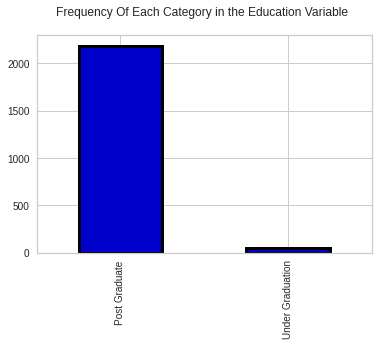

In [1163]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Education"
print("Unique categories present in the Education:\n",df["Education"].value_counts())
print('\n')
#VISUALIZING THE "Education"
df['Education'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n")

In [1164]:
## Converting from string to datetime 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [1165]:
type(df['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Creating more features

In [1166]:
## We will assume that all the information was collected on 2014-12-06
## Finding the age of the customer with respect to 2014
## Finding the number of days the person is client
#df['Age'] = 2014 - df['Year_Birth']

# Analyze Year of Birth
# Adding a column "Age" in the dataframe
df['Age'] =  int(pd.datetime.now().year) - df['Year_Birth']
print(df.head())


   Year_Birth      Education    Marital_Status  ...  Complain  Response  Age
0        1957  Post Graduate  non_relationship  ...         0         1   64
1        1954  Post Graduate  non_relationship  ...         0         0   67
2        1965  Post Graduate   in_relationship  ...         0         0   56
3        1984  Post Graduate   in_relationship  ...         0         0   37
4        1981  Post Graduate   in_relationship  ...         0         0   40

[5 rows x 27 columns]


128     1
81      1
122     1
80      1
121     1
25      2
27      3
28      5
26      5
77      7
78      7
76      8
29     13
30     15
75     16
74     16
31     18
73     21
34     27
71     29
33     29
32     30
72     30
36     32
68     35
60     36
37     38
40     39
41     39
57     42
38     42
35     42
64     43
70     43
59     44
54     44
39     45
58     45
61     49
66     49
67     50
55     50
62     51
53     51
69     52
44     52
63     53
42     53
65     55
47     69
52     71
56     74
48     74
43     77
51     77
49     79
46     83
50     87
45     89
Name: Age, dtype: int64
The Oldest customer is : 128 years old
The youngest customer is : 25 years old


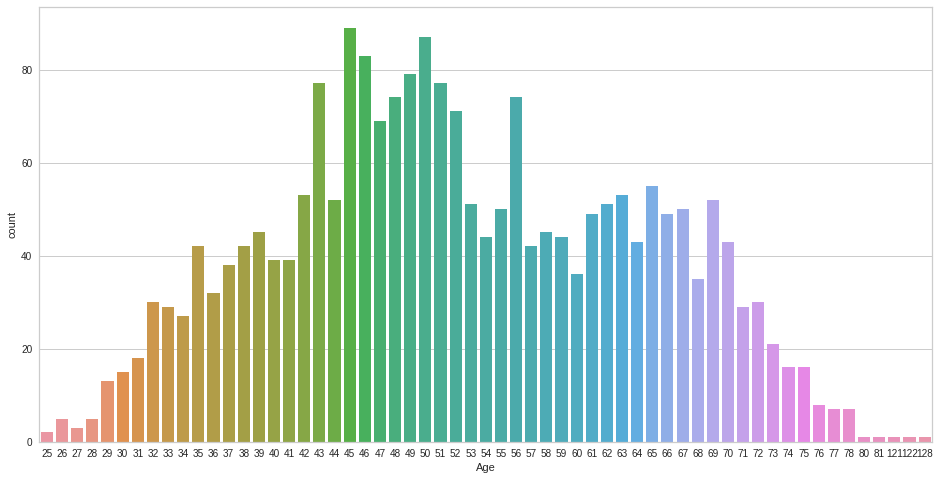

In [1167]:
# print Age 
print(df['Age'].value_counts(ascending=True))
print("The Oldest customer is :",df['Age'].max(), "years old")
print("The youngest customer is :",df['Age'].min(), "years old")
plt.figure(figsize = (16,8))
sns.countplot(df['Age'])

The Oldest customer is : 81 years old
80     1
81     1
25     2
27     3
28     5
26     5
77     7
78     7
76     8
29    13
30    15
75    16
74    16
31    18
73    21
34    27
33    29
71    29
32    30
72    30
36    32
68    35
60    36
37    38
40    39
41    39
57    42
35    42
38    42
70    43
64    43
54    44
59    44
39    45
58    45
66    49
61    49
67    50
55    50
53    51
62    51
69    52
44    52
63    53
42    53
65    55
47    69
52    71
56    74
48    74
51    77
43    77
49    79
46    83
50    87
45    89
Name: Age, dtype: int64


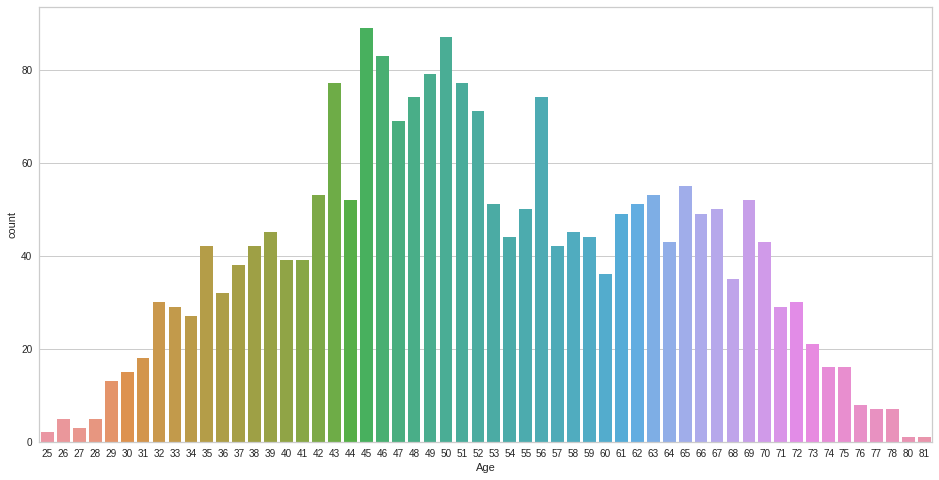

In [1168]:
#Dropping the outliers by setting a cap on Age. 
df = df[(df['Age']<90)]
print("The Oldest customer is :",df['Age'].max(), "years old")
print(df['Age'].value_counts(ascending=True))
plt.figure(figsize = (16,8))
sns.countplot(df['Age'])

In [1169]:
#  correlation  between age and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')   
# create function which will give  Age  interval 
 
    
def create_interval_column(age_df, interval):
    inter = []
    interval = interval
    j = 0
    while (j<100):
        j = j + interval
        inter.append(j)
    interval_column = [] 
    for i in age_df['Year_Birth']:
        for j in range(len(inter)-1):
            if inter[j]<i <=inter[j+1]:
                interval_column.append(str(inter[j]) + '-' + str(inter[j+1]))
                break
    return interval_column

interval_you_want_to_plot = 10 

columns_to_be_analyzed = ['MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

age_df = df.groupby(by = ['Year_Birth']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum','MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()
age_df['Year_Birth'] = int(pd.datetime.now().year) - age_df['Year_Birth'] 
age_df.drop([0,1,2], axis = 0, inplace=True)

interval_column = create_interval_column(age_df, interval=interval_you_want_to_plot )# Creating interval of 5

age_df['Interval_column'] = interval_column

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = age_df['Interval_column'].to_numpy(), 
                             y = age_df[columns_to_be_analyzed[cnt]].to_numpy()), 
                    row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"),
                 showlegend=False,autosize=True,
                  width=1200,
                  height=800)
fig.show()

0    1291
1     898
2      48
Name: Kidhome, dtype: int64


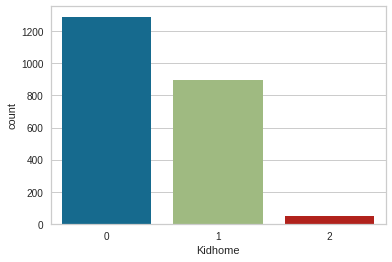

In [1170]:
#Calculate the Kidhome: Number of children in customer's household
print(df['Kidhome'].value_counts())
sns.countplot(df['Kidhome'])

0    1156
1    1029
2      52
Name: Teenhome, dtype: int64


array([0, 1, 2])

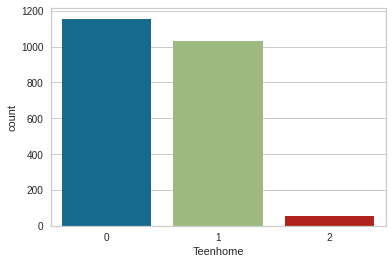

In [1171]:
#Calculate the Teenhome: Number of teens in customer's household
print(df['Teenhome'].value_counts())
sns.countplot(df['Teenhome'])
df['Teenhome'].unique()

Unique categories present in the Kids:
 1    1126
0     637
2     421
3      53
Name: Kids, dtype: int64


['Education', 'Marital_Status']
Maretial-status 
 0    1443
1     794
Name: Marital_Status, dtype: int64


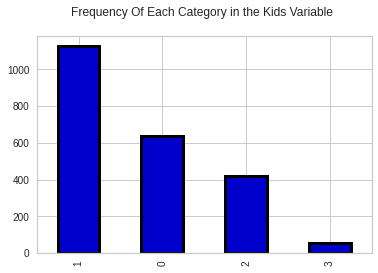

In [1172]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Kids"
print("Unique categories present in the Kids:\n",df['Kids'].value_counts())
print("\n")


#VISUALIZING THE "Kids"
df['Kids'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Kids Variable \n")


# Add Family size 
#Feature for total members in the householde


obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
  

label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])
print(obj_col) 

print("Maretial-status \n" , df['Marital_Status'].value_counts())



In [1173]:

## Through below code, We are finding total monthly purchase/spend of the customers

df['Total_Spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
## We are finding the total number of purchases(Deals, web, catelog and store) the customer made 
df['AllPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']


## Total number of accepted offers
df['TotalAcceptedOffers'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']



#Seniority variable creation
## Finding the number of days the person is client
## Finding the max time

df['Collected'] = '2014-12-06'
df['Collected'] = pd.to_datetime(df['Collected'])
df['Days_is_client'] = (df['Collected'] - df['Dt_Customer']).dt.days
 

## cap on income 
df.query('Income != 666666.0', inplace=True)
print("max income is:",df['Income'].max())
print("min income is:",df['Income'].min())

## Removing customers who didnt make a purchase
## query is used to evaluate some condition 
df = df.query('AllPurchases != 0')

#highlight the age and time that a person is a client
print( "This customer is with us since",df['Dt_Customer'].min())  
print ("This Customer joined recently from this date:", df['Dt_Customer'].max())





## Recency analysis
print( "Customer with most recent non transaction streak is",df['Recency'].min(),"days")  
print ("Customer with longest non transaction streak is",df['Recency'].max(),"days")
# Rename features 
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
df.head()






max income is: 162397.0
min income is: 1730.0
This customer is with us since 2012-01-08 00:00:00
This Customer joined recently from this date: 2014-12-06 00:00:00
Customer with most recent non transaction streak is 0 days
Customer with longest non transaction streak is 99 days


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Collected,Days_is_client
0,1957,0,1,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25,1,2014-12-06,971
1,1954,0,1,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6,0,2014-12-06,125
2,1965,0,0,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21,0,2014-12-06,472
3,1984,0,0,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8,0,2014-12-06,65
4,1981,0,0,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19,0,2014-12-06,321


### Removing irrelevant features

In [1174]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'Web', 'Catalog', 'Store',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Kids',
       'Total_Spend', 'AllPurchases', 'TotalAcceptedOffers', 'Collected',
       'Days_is_client'],
      dtype='object')

In [1175]:
## Removing customers who didnt make a purchase
## query is used to evaluate some condition 
df = df.loc[(df['AllPurchases'] != 0)]

In [1176]:
irrelevantFeats = ['Kidhome', 'Teenhome', 'Year_Birth',
                   'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 
                   'AcceptedCmp1', 'AcceptedCmp2','Complain','Response','Wines', 'Fruits', 'Meat', 'Fish',
                    'Sweets', 'Gold','Collected','Dt_Customer','Web', 'Catalog', 'Store' ]
df.drop(irrelevantFeats, axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Age,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client
0,0,1,58138.0,58,3,7,64,0,1617,25,1,971
1,0,1,46344.0,38,2,5,67,2,27,6,0,125
2,0,0,71613.0,26,1,4,56,0,776,21,0,472
3,0,0,26646.0,26,2,6,37,1,53,8,0,65
4,0,0,58293.0,94,5,5,40,1,422,19,0,321


In [1177]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'Age', 'Kids', 'Total_Spend', 'AllPurchases',
       'TotalAcceptedOffers', 'Days_is_client'],
      dtype='object')

In [1178]:
### Move Age column to first position
column_to_move = df.pop("Age")
df.insert(0, "Age", column_to_move)

In [1179]:
df.head()

,Age,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client
0,64,0,1,58138.0,58,3,7,0,1617,25,1,971
1,67,0,1,46344.0,38,2,5,2,27,6,0,125
2,56,0,0,71613.0,26,1,4,0,776,21,0,472
3,37,0,0,26646.0,26,2,6,1,53,8,0,65
4,40,0,0,58293.0,94,5,5,1,422,19,0,321


In [1180]:
# check the Data set 
df.info()
  
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2232 non-null   int64  
 1   Education            2232 non-null   int64  
 2   Marital_Status       2232 non-null   int64  
 3   Income               2232 non-null   float64
 4   Recency              2232 non-null   int64  
 5   NumDealsPurchases    2232 non-null   int64  
 6   NumWebVisitsMonth    2232 non-null   int64  
 7   Kids                 2232 non-null   int64  
 8   Total_Spend          2232 non-null   int64  
 9   AllPurchases         2232 non-null   int64  
 10  TotalAcceptedOffers  2232 non-null   int64  
 11  Days_is_client       2232 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 226.7 KB


,Age,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client
0,64,0,1,58138.0,58,3,7,0,1617,25,1,971
1,67,0,1,46344.0,38,2,5,2,27,6,0,125
2,56,0,0,71613.0,26,1,4,0,776,21,0,472
3,37,0,0,26646.0,26,2,6,1,53,8,0,65
4,40,0,0,58293.0,94,5,5,1,422,19,0,321


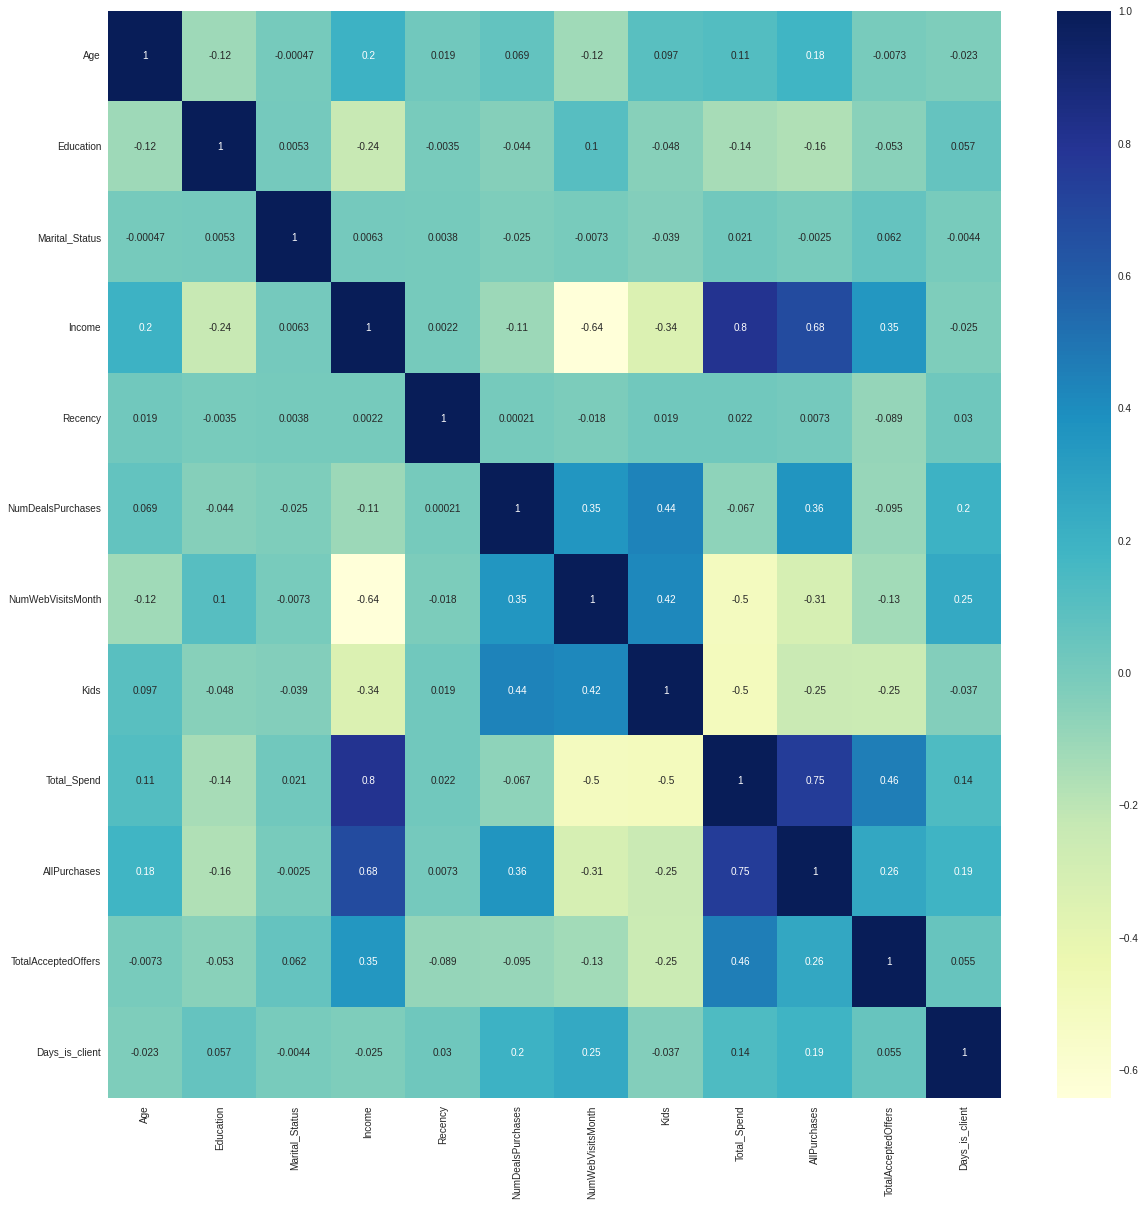

In [1181]:
fig, ax = plt.subplots(figsize=(20,20))  
fig = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [1182]:
irrelevantFeats = ['Recency','NumWebVisitsMonth']
df.drop(irrelevantFeats, axis=1, inplace=True)
df.head()

,Age,Education,Marital_Status,Income,NumDealsPurchases,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client
0,64,0,1,58138.0,3,0,1617,25,1,971
1,67,0,1,46344.0,2,2,27,6,0,125
2,56,0,0,71613.0,1,0,776,21,0,472
3,37,0,0,26646.0,2,1,53,8,0,65
4,40,0,0,58293.0,5,1,422,19,0,321


In [1183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2232 non-null   int64  
 1   Education            2232 non-null   int64  
 2   Marital_Status       2232 non-null   int64  
 3   Income               2232 non-null   float64
 4   NumDealsPurchases    2232 non-null   int64  
 5   Kids                 2232 non-null   int64  
 6   Total_Spend          2232 non-null   int64  
 7   AllPurchases         2232 non-null   int64  
 8   TotalAcceptedOffers  2232 non-null   int64  
 9   Days_is_client       2232 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 191.8 KB


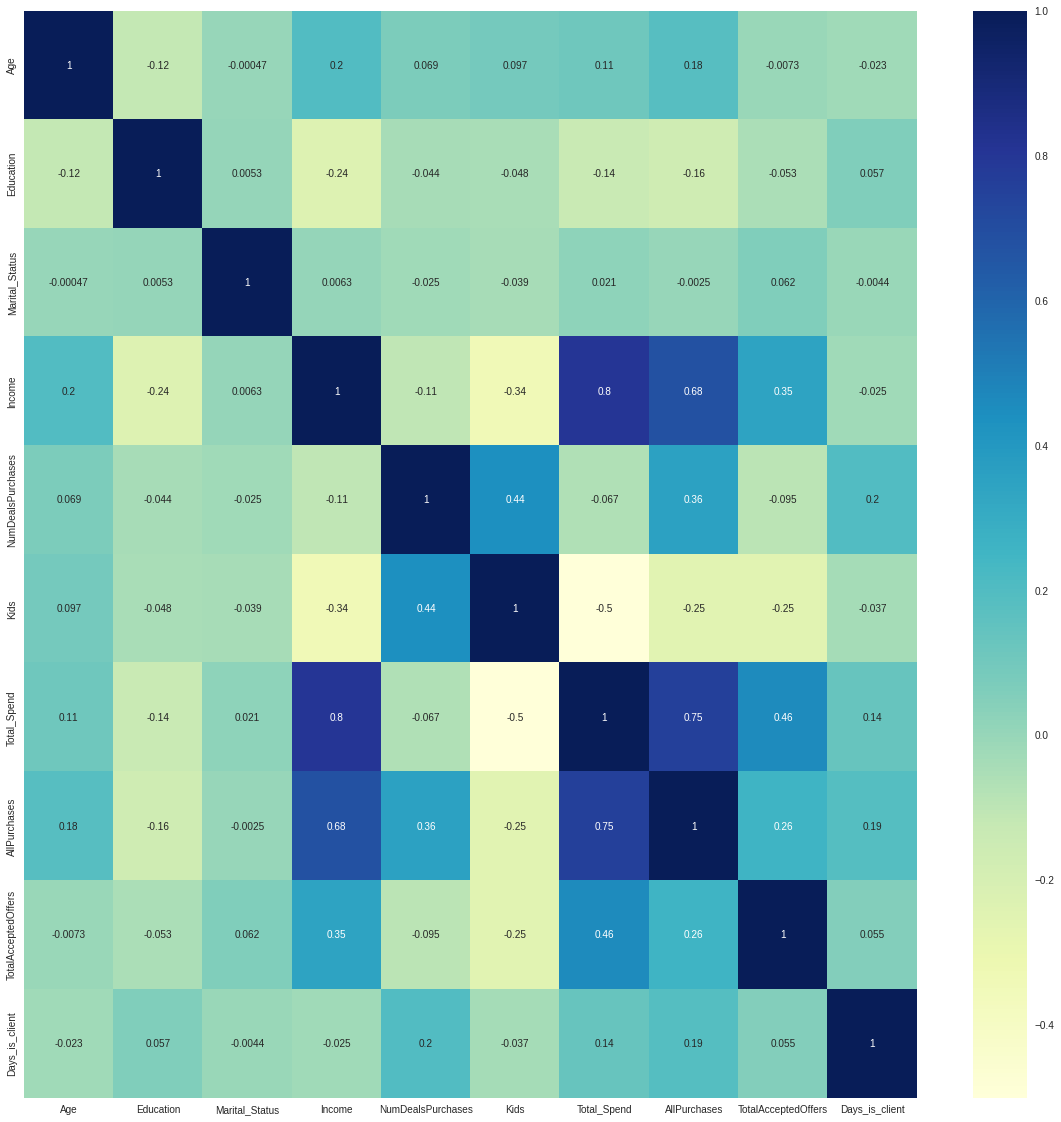

In [1184]:
fig, ax = plt.subplots(figsize=(20,20))  
fig = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [1185]:
# Check the data 
df.head()

,Age,Education,Marital_Status,Income,NumDealsPurchases,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client
0,64,0,1,58138.0,3,0,1617,25,1,971
1,67,0,1,46344.0,2,2,27,6,0,125
2,56,0,0,71613.0,1,0,776,21,0,472
3,37,0,0,26646.0,2,1,53,8,0,65
4,40,0,0,58293.0,5,1,422,19,0,321


In [1186]:
#Get list of Numirical variables
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['Age', 'Education', 'Marital_Status', 'Income', 'NumDealsPurchases', 'Kids', 'Total_Spend', 'AllPurchases', 'TotalAcceptedOffers', 'Days_is_client']


In [1187]:
df.dtypes

Age                      int64
Education                int64
Marital_Status           int64
Income                 float64
NumDealsPurchases        int64
Kids                     int64
Total_Spend              int64
AllPurchases             int64
TotalAcceptedOffers      int64
Days_is_client           int64
dtype: object

In [1188]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [1189]:
df['Education'].value_counts()

0    2178
1      54
Name: Education, dtype: int64

In [1190]:
df[ 'Marital_Status'].value_counts()

0    1441
1     791
Name: Marital_Status, dtype: int64

In [1191]:
df.isna().any()

Age                    False
Education              False
Marital_Status         False
Income                 False
NumDealsPurchases      False
Kids                   False
Total_Spend            False
AllPurchases           False
TotalAcceptedOffers    False
Days_is_client         False
dtype: bool

In [1192]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [1193]:
df['Marital_Status'].value_counts()

0    1441
1     791
Name: Marital_Status, dtype: int64

In [1194]:
lbl_encode = LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [1195]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2232 non-null   int64  
 1   Education            2232 non-null   int64  
 2   Marital_Status       2232 non-null   int64  
 3   Income               2232 non-null   float64
 4   NumDealsPurchases    2232 non-null   int64  
 5   Kids                 2232 non-null   int64  
 6   Total_Spend          2232 non-null   int64  
 7   AllPurchases         2232 non-null   int64  
 8   TotalAcceptedOffers  2232 non-null   int64  
 9   Days_is_client       2232 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 191.8 KB


In [1196]:
df.head()


,Age,Education,Marital_Status,Income,NumDealsPurchases,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client
0,64,0,1,58138.0,3,0,1617,25,1,971
1,67,0,1,46344.0,2,2,27,6,0,125
2,56,0,0,71613.0,1,0,776,21,0,472
3,37,0,0,26646.0,2,1,53,8,0,65
4,40,0,0,58293.0,5,1,422,19,0,321


In [1197]:
df['Marital_Status'].value_counts()

0    1441
1     791
Name: Marital_Status, dtype: int64

In [1198]:
df['Education'].value_counts()

0    2178
1      54
Name: Education, dtype: int64

In [1199]:
df[df['Education']== 2]



,Age,Education,Marital_Status,Income,NumDealsPurchases,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client


In [1200]:
print (df.isna())

        Age  Education  ...  TotalAcceptedOffers  Days_is_client
0     False      False  ...                False           False
1     False      False  ...                False           False
2     False      False  ...                False           False
3     False      False  ...                False           False
4     False      False  ...                False           False
...     ...        ...  ...                  ...             ...
2235  False      False  ...                False           False
2236  False      False  ...                False           False
2237  False      False  ...                False           False
2238  False      False  ...                False           False
2239  False      False  ...                False           False

[2232 rows x 10 columns]


In [1201]:
df.isna().any()

Age                    False
Education              False
Marital_Status         False
Income                 False
NumDealsPurchases      False
Kids                   False
Total_Spend            False
AllPurchases           False
TotalAcceptedOffers    False
Days_is_client         False
dtype: bool

In [1202]:
df= df.dropna()

In [1203]:
df.isna().any()

Age                    False
Education              False
Marital_Status         False
Income                 False
NumDealsPurchases      False
Kids                   False
Total_Spend            False
AllPurchases           False
TotalAcceptedOffers    False
Days_is_client         False
dtype: bool

##Confirm data is ready with further exploratory analysis

In [1204]:
print("Data is cleand , Numaric and ready for further EDA")

Data is cleand , Numaric and ready for further EDA


In [1205]:
# Export to CSV file
df.to_csv('./marketingDf_cleaned.csv', index=False)

In [1206]:
## importing the cleaned data csv file
df_cleaned = pd.read_csv('./marketingDf_cleaned.csv')

In [1207]:
df_cleaned.head()

,Age,Education,Marital_Status,Income,NumDealsPurchases,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client
0,64,0,1,58138.0,3,0,1617,25,1,971
1,67,0,1,46344.0,2,2,27,6,0,125
2,56,0,0,71613.0,1,0,776,21,0,472
3,37,0,0,26646.0,2,1,53,8,0,65
4,40,0,0,58293.0,5,1,422,19,0,321


## (5) Choose the label and features

In [1208]:
# Create two DataFrames for both the label and the features
labelDf = df_cleaned['Total_Spend']
featuresDf = df_cleaned.drop(['Total_Spend'], axis=1)

## (6) Confirm data is ready with further exploratory analysis

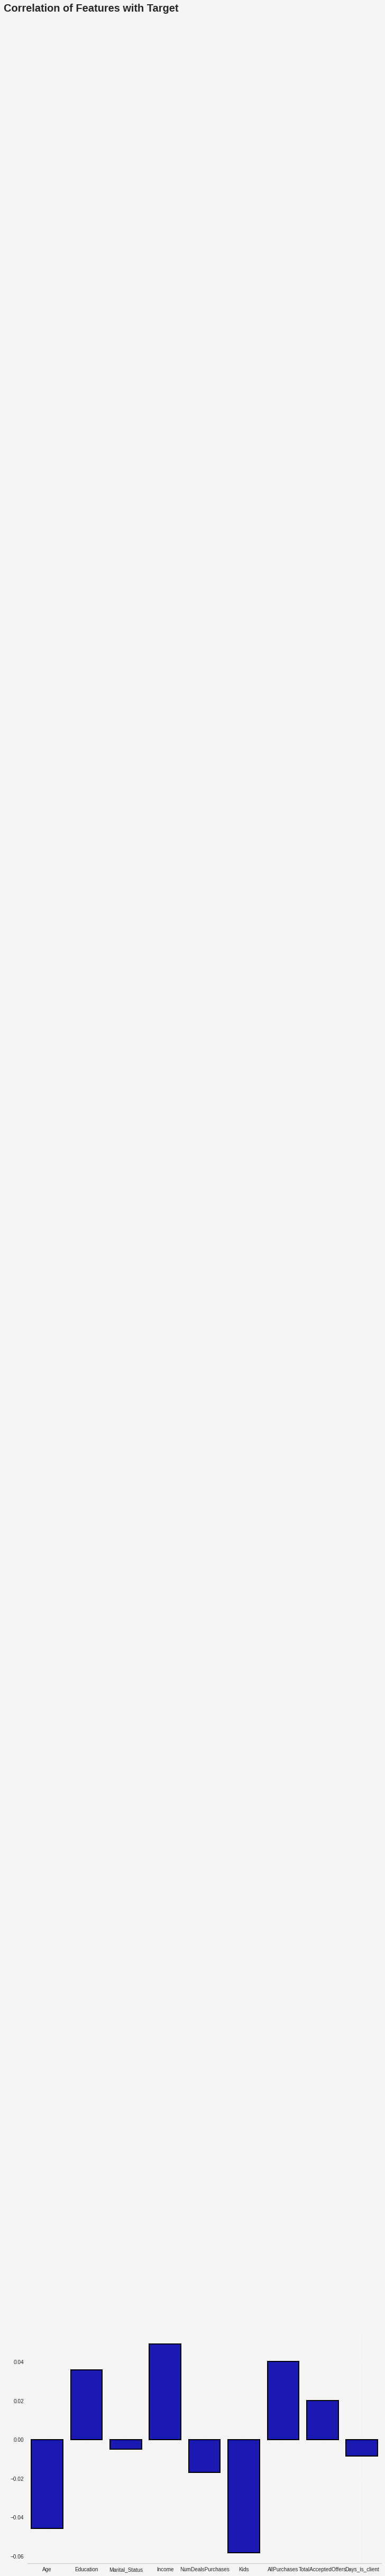

In [1209]:
import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(12, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(featuresDf.corrwith(df['Total_Spend']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='mediumblue', zorder=3, edgecolor='black', linewidth=2)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

In [1210]:
df_cleaned.head()

,Age,Education,Marital_Status,Income,NumDealsPurchases,Kids,Total_Spend,AllPurchases,TotalAcceptedOffers,Days_is_client
0,64,0,1,58138.0,3,0,1617,25,1,971
1,67,0,1,46344.0,2,2,27,6,0,125
2,56,0,0,71613.0,1,0,776,21,0,472
3,37,0,0,26646.0,2,1,53,8,0,65
4,40,0,0,58293.0,5,1,422,19,0,321


In [1211]:
# (7) Training, Testing (and/or Validation) data split 

# 60/20/20

# Training we have 95% and 5% for test


from sklearn.model_selection import train_test_split
trainF, testF, trainL, testL = train_test_split( featuresDf, labelDf, test_size=0.05, random_state=42 )

# Divide the test into two parts: 70% for test and 30% for validation
testF, valF, testL, valL = train_test_split( testF, testL, test_size=0.7, random_state=42 )

In [1212]:
# (8) Training the Machine Learning Model (i.e, Fitting the Model)
for dataset in [trainF, valF, testF]:
    ratio = round(len(dataset)/len(featuresDf), 2)
    print(ratio)

0.95
0.04
0.01


In [1213]:
trainF.to_csv('./train_features.csv', index=False)
trainL.to_csv('./train_labels.csv', index=False)

valF.to_csv('./validation_features.csv', index=False)
valL.to_csv('./validation_labels.csv', index=False)

testF.to_csv('./test_features.csv', index=False)
testL.to_csv('./test_labels.csv', index=False)

In [1214]:
from sklearn.ensemble import RandomForestClassifier
# Import the function for evaluating the model
from sklearn.model_selection import cross_val_score

# Hide warnings in-case python is outdated
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [1215]:
trainF = pd.read_csv('./train_features.csv')
trainL = pd.read_csv('./train_labels.csv')

trainF.head()



,Age,Education,Marital_Status,Income,NumDealsPurchases,Kids,AllPurchases,TotalAcceptedOffers,Days_is_client
0,52,0,0,74918.0,1,0,21,1,368
1,59,0,0,42769.0,2,1,8,0,361
2,73,0,0,77142.0,1,0,17,0,556
3,51,0,0,63684.0,3,1,23,0,740
4,45,0,1,60000.0,5,1,24,0,714


In [1216]:
# (9) Evaluate the model metrics for Training (and/or Validation) data
print( len(trainF) )
print( len(trainL) )

2120
2120


In [1217]:
# (10) Evaluate the model metris for Testing data


# If metrics are poor, optimize either (a) the data, (b) the hyperpamaters
# Instantiate the RandomForestClassifier
rfModel = RandomForestClassifier()

# arguments:
# (1) rfModel: machine learning model
# (2) trainF: training features
# (3) trainL: training labels
# (4) cv=5: number of folds
# Note:
# the .ravel() will convert the DataFrame to a Python List 
scores = cross_val_score( rfModel, trainF, trainL.values.ravel(), cv=5 )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [1218]:


def printResults(gridSearchResults):

    print( 'Best ML Hyperparameters: {}\n'.format(gridSearchResults.best_params_) )

    means = gridSearchResults.cv_results_['mean_test_score']
    stnDvs = gridSearchResults.cv_results_['std_test_score']

    for mean, stnDvs, parameters in zip( means, stnDvs, gridSearchResults.cv_results_['params'] ):
        print(
            '{} (+/-{}) for {}'.format(
                round(mean, 3),
                round(stnDvs*2, 3),
                parameters
            ) 
        )

In [1219]:
# Import GridSearchCV for finding the model with the best parameters
from sklearn.model_selection import GridSearchCV

# Instantiate the model and set the hyperparameters 
rfModel = RandomForestClassifier()

hyperparameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

# GridSearchCV will search and rank the models according their parameters
# Note:
# sklearn refers to 'hyperparameters' as 'parameters'
gridSearch = GridSearchCV( rfModel, hyperparameters, cv=5 )

# .fit() will have the model, rfModel, learn the parameters of the features
gridSearch.fit( trainF, trainL.values.ravel() )

printResults( gridSearch )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Best ML Hyperparameters: {'max_depth': 20, 'n_estimators': 100}

0.01 (+/-0.004) for {'max_depth': 2, 'n_estimators': 5}
0.018 (+/-0.011) for {'max_depth': 2, 'n_estimators': 50}
0.017 (+/-0.004) for {'max_depth': 2, 'n_estimators': 100}
0.062 (+/-0.008) for {'max_depth': 10, 'n_estimators': 5}
0.137 (+/-0.021) for {'max_depth': 10, 'n_estimators': 50}
0.151 (+/-0.018) for {'max_depth': 10, 'n_estimators': 100}
0.134 (+/-0.015) for {'max_depth': 20, 'n_estimators': 5}
0.179 (+/-0.024) for {'max_depth': 20, 'n_estimators': 50}
0.18 (+/-0.023) for {'max_depth': 20, 'n_estimators': 100}
0.16 (+/-0.036) for {'max_depth': None, 'n_estimators': 5}
0.176 (+/-0.027) for {'max_depth': None, 'n_estimators': 50}
0.176 (+/-0.03) for {'max_depth': None, 'n_estimators': 100}


In [1220]:
rfModel1 = RandomForestClassifier(n_estimators=50, max_depth=None)
rfModel1.fit( trainF, trainL.values.ravel() )

rfModel2 = RandomForestClassifier(n_estimators=5, max_depth=10)
rfModel2.fit( trainF, trainL.values.ravel() )

rfModel3 = RandomForestClassifier(n_estimators=100, max_depth=10)
rfModel3.fit( trainF, trainL.values.ravel() )

RandomForestClassifier(max_depth=10)

In [1221]:
# Iterate over the top 3 models and have each predict the label.
# Then, compare the metrics for each model to find best of 3.

for rfML in [rfModel1, rfModel2, rfModel3]:

    predictedLabels = rfML.predict(valF)

    # Find the metrics for the model: (a) accuracy, (b) precision, and (c) recall
    accuracy = round(accuracy_score(valL, predictedLabels), 3)
    #precision = round(precision_score(valL, predictedLabels), average= micro)
    #recall = round(recall_score(valL, predictedLabels), 3)

    # Print the metrics for each model
    print(
        'Max depth: {} and Estimators: {}'.format(rfML.max_depth, rfML.n_estimators)
    )
    print("Accuracy is:",accuracy)
        
    print('-------------------------------------------------')
    

Max depth: None and Estimators: 50
Accuracy is: 0.203
-------------------------------------------------
Max depth: 10 and Estimators: 5
Accuracy is: 0.038
-------------------------------------------------
Max depth: 10 and Estimators: 100
Accuracy is: 0.165
-------------------------------------------------


In [1222]:
# (11) Use the model for prediction
# (11) Use the model for prediction
newDataFeatures = {
    'Age':[55]
    'Education': [0],
    'Marital_Status': [0],
    'Income': [28000],
    'NumDealsPurchases': [3],
    'TotalAcceptedOffers':[1],
    'Kids':[1],
    'Days_is_client':[150],
    'AllPurchases':[10]  
}

newDataFeaturesDf = pd.DataFrame(data=newDataFeatures)
newDataFeaturesDf.head()

SyntaxError: ignored

In [ ]:
newDataFeaturesDf.head()

In [ ]:

predictedLabels = rfModel3.predict( newDataFeaturesDf )

# Append the label (AllPurchases ) to the dataframe
newDataFeaturesDf['Total_Spend'] = predictedLabels

newDataFeaturesDf.head()



In [ ]:
# (12) Write final predicted data  (e.g, to CSV or JSON, etc.)

newDataFeaturesDf.to_csv('./predicted_labels.csv', index=False)